# Pre Processing

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Dropout
from scipy.io import loadmat
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report


In [1]:
# Path to your MATLAB (.mat) file
file_path = 'D:/ML project version 2/Dataset/4_AV_features.csv'

In [4]:
# Load data from the MATLAB file
file_data = pd.read_csv(file_path)

In [5]:
# Split features (X) and target (y)
X = file_data.iloc[1:, :13]  # Features (columns 0 to 13)
y = file_data.iloc[1:, 13]   # Labels (column 14th column)

In [6]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# Decision Tree

Decision Tree Accuracy: 0.7368421052631579
Decision Tree Confusion Matrix:
[[132  38]
 [ 42  92]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       170
           1       0.71      0.69      0.70       134

    accuracy                           0.74       304
   macro avg       0.73      0.73      0.73       304
weighted avg       0.74      0.74      0.74       304



<Figure size 400x300 with 0 Axes>

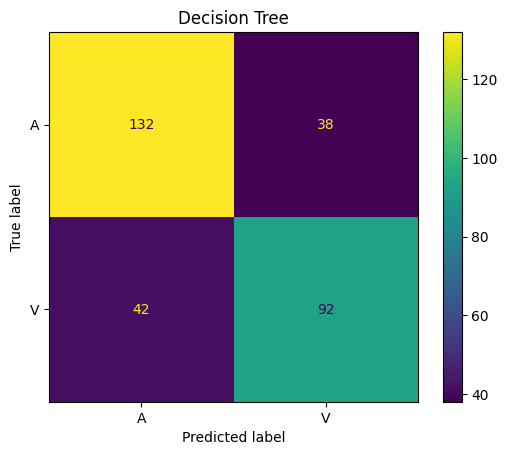

In [7]:

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_conf_matrix = confusion_matrix(y_test, dt_pred)
dt_class_report = classification_report(y_test, dt_pred)

print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Confusion Matrix:")
print(dt_conf_matrix)
print("Decision Tree Classification Report:")
print(dt_class_report)

# Plot confusion matrix
plt.figure(figsize=(4, 3))
ConfusionMatrixDisplay(dt_conf_matrix, display_labels=['A', 'V' ]).plot()
plt.title('Decision Tree')
plt.show()

# KNN


KNN Accuracy: 0.805921052631579
KNN Confusion Matrix:
[[153  17]
 [ 42  92]]
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       170
           1       0.84      0.69      0.76       134

    accuracy                           0.81       304
   macro avg       0.81      0.79      0.80       304
weighted avg       0.81      0.81      0.80       304



<Figure size 400x300 with 0 Axes>

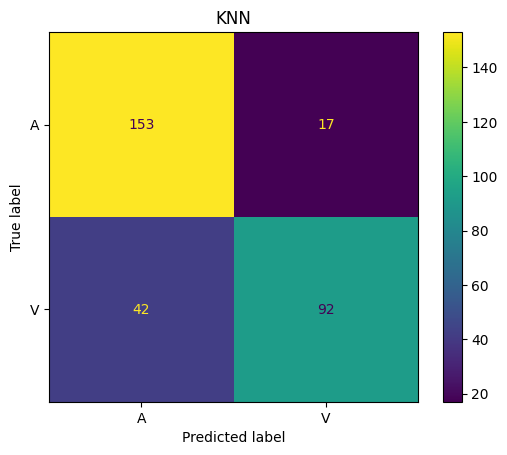

In [9]:
# K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
knn_pred = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_conf_matrix = confusion_matrix(y_test, knn_pred)
knn_class_report = classification_report(y_test, knn_pred)

print("\nKNN Accuracy:", knn_accuracy)
print("KNN Confusion Matrix:")
print(knn_conf_matrix)
print("KNN Classification Report:")
print(knn_class_report)

# Plot confusion matrix
plt.figure(figsize=(4, 3))
ConfusionMatrixDisplay(knn_conf_matrix, display_labels=['A', 'V' ]).plot()
plt.title('KNN')
plt.show()

# Random Forest

Accuracy: 0.8092105263157895
Confusion Matrix:
 [[155  15]
 [ 43  91]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       170
           1       0.86      0.68      0.76       134

    accuracy                           0.81       304
   macro avg       0.82      0.80      0.80       304
weighted avg       0.82      0.81      0.81       304



<Figure size 400x300 with 0 Axes>

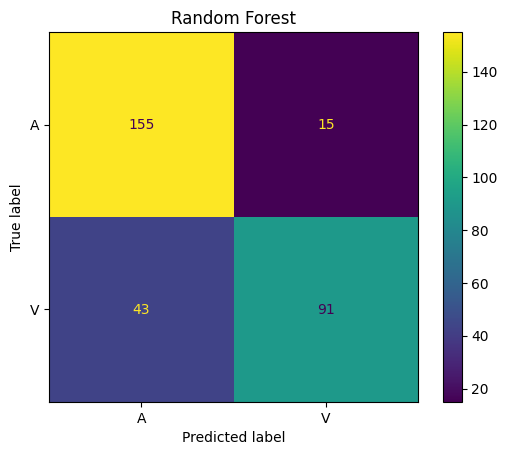

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100,
                                criterion='gini',
                                max_depth=None,
                                min_samples_split=2,
                                min_samples_leaf=1,
                                max_features='sqrt',
                                bootstrap=True,
                                class_weight=None,
                                random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
rf_conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", rf_conf_matrix)
print("Classification Report:\n", class_report)


# Plot confusion matrix
plt.figure(figsize=(4, 3))
ConfusionMatrixDisplay(rf_conf_matrix, display_labels=['A', 'V' ]).plot()
plt.title('Random Forest')
plt.show()

# Ensemble of bagged trees
*with a base classifier of Decision Trees*

Accuracy: 0.7828947368421053
Confusion Matrix:
 [[153  17]
 [ 49  85]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.90      0.82       170
           1       0.83      0.63      0.72       134

    accuracy                           0.78       304
   macro avg       0.80      0.77      0.77       304
weighted avg       0.79      0.78      0.78       304



<Figure size 400x300 with 0 Axes>

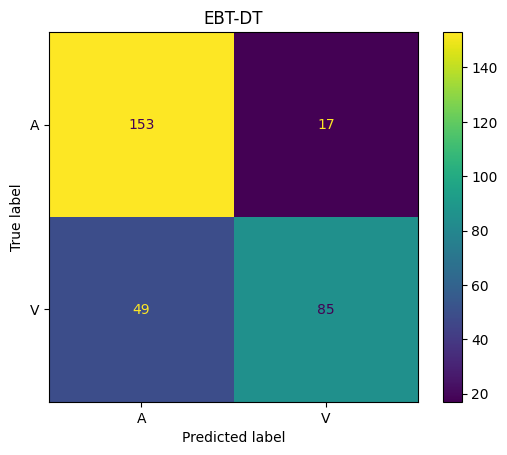

In [11]:
#  Esemble of Bagged trees with a base classifier of Decision Tree

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Initialize the base decision tree classifier
base_classifier = DecisionTreeClassifier()

# Initialize the bagging classifier with decision tree as base estimator
bagging_classifier = BaggingClassifier(estimator=base_classifier, n_estimators=10, random_state=42)

# Train the bagging classifier
bagging_classifier.fit(X_train, y_train)

# Make predictions
y_pred = bagging_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
ebt_conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", ebt_conf_matrix)
print("Classification Report:\n", class_report)

# Plot confusion matrix
plt.figure(figsize=(4, 3))
ConfusionMatrixDisplay(ebt_conf_matrix, display_labels=['A', 'V']).plot()
plt.title('EBT-DT')
plt.show()

# Ensemble of bagged trees 2
*with a base classifier of Random Forest*

Accuracy: 0.8026315789473685
Confusion Matrix:
 [[157  13]
 [ 47  87]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.92      0.84       170
           1       0.87      0.65      0.74       134

    accuracy                           0.80       304
   macro avg       0.82      0.79      0.79       304
weighted avg       0.81      0.80      0.80       304



<Figure size 400x300 with 0 Axes>

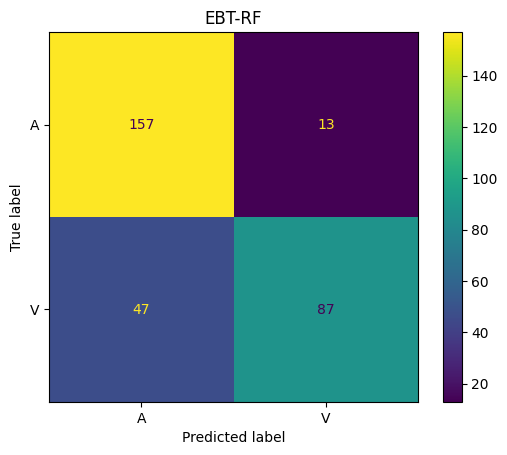

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

# Initialize the base random forest classifier
base_classifier = RandomForestClassifier()

# Initialize the bagging classifier with random forest as base estimator
bagging_classifier = BaggingClassifier(estimator=base_classifier, n_estimators=10, random_state=42)

# Train the bagging classifier
bagging_classifier.fit(X_train, y_train)

# Make predictions
y_pred = bagging_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
ebt2_conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", ebt2_conf_matrix)
print("Classification Report:\n", class_report)

# Plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(figsize=(4, 3))
ConfusionMatrixDisplay(ebt2_conf_matrix, display_labels=['A', 'V' ]).plot()
plt.title('EBT-RF')
plt.show()

# SVM

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Test Accuracy: 0.7993421052631579
Confusion Matrix:
[[163   7]
 [ 54  80]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.96      0.84       170
           1       0.92      0.60      0.72       134

    accuracy                           0.80       304
   macro avg       0.84      0.78      0.78       304
weighted avg       0.83      0.80      0.79       304



<Figure size 400x300 with 0 Axes>

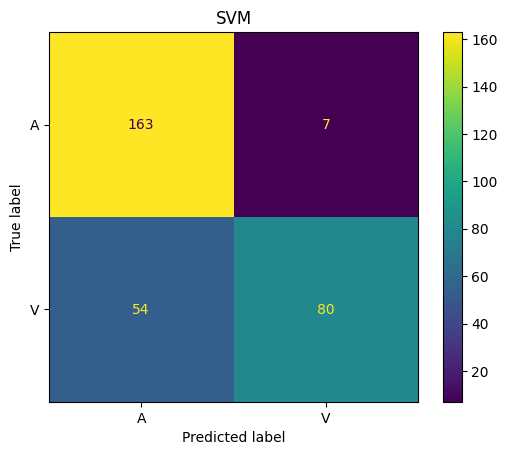

In [14]:
# Create SVM model
svm_model = SVC(kernel='rbf', random_state=42)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_model.predict(X_test)

svm_conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Print confusion matrix
print("Confusion Matrix:")
print(svm_conf_matrix)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Plot confusion matrix
plt.figure(figsize=(4, 3))
ConfusionMatrixDisplay(svm_conf_matrix, display_labels=['A', 'V' ]).plot()
plt.title('SVM')
plt.show()

# Gradient Boosting Machine

In [15]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

Test Accuracy: 0.8289473684210527
Confusion Matrix:
[[155  15]
 [ 37  97]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       170
           1       0.87      0.72      0.79       134

    accuracy                           0.83       304
   macro avg       0.84      0.82      0.82       304
weighted avg       0.83      0.83      0.83       304



<Figure size 400x300 with 0 Axes>

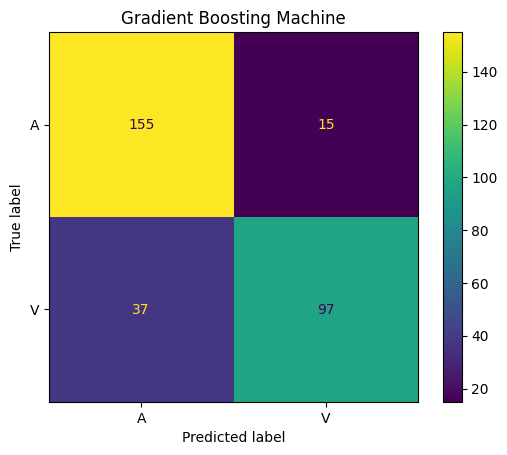

In [16]:
# Create XGBoost model
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = xgb_model.predict(X_test)

gbm_conf_matrix = confusion_matrix(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Print confusion matrix
print("Confusion Matrix:")
print(gbm_conf_matrix)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Plot confusion matrix
plt.figure(figsize=(4, 3))
ConfusionMatrixDisplay(gbm_conf_matrix, display_labels=['A', 'V' ]).plot()
plt.title('Gradient Boosting Machine')
plt.show()